## Глубокое обучение в компьютерном зрении. Интерактивный курс. Урок 1.

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [22]:
img = imageio.imread('img.jpeg')

In [23]:
print(img.shape)

(827, 1470, 3)


In [26]:
img_bw = np.copy(img[:, :, 0])
print(img_bw.shape)

(827, 1470)


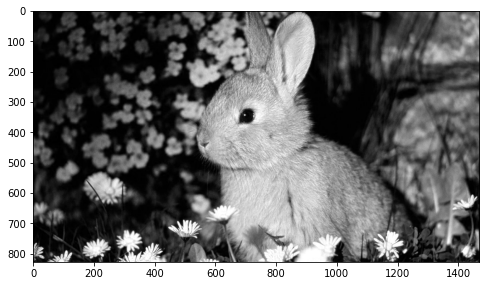

In [27]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

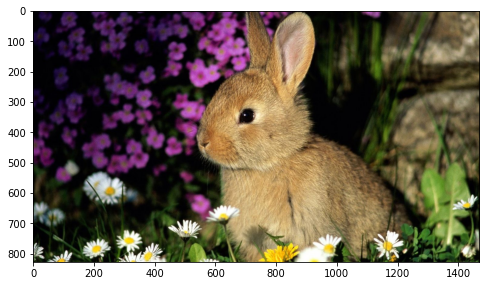

In [28]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [29]:
img_color = np.copy(img.astype(np.float32) / 255)
print(img_color.shape)

(827, 1470, 3)


Нелинейное уменьшение яркости

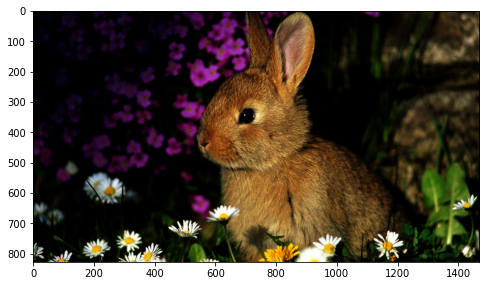

In [34]:
plt.figure(figsize=(8, 8))
plt.imshow(img_color**2) # возведение в квадрат

In [35]:
from skimage.color import rgb2hsv, hsv2rgb

In [36]:
img_hsv = rgb2hsv(img_color)

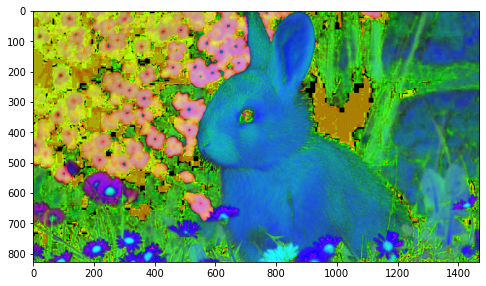

In [37]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

Линейное уменьшение насыщенности

In [38]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv_new)

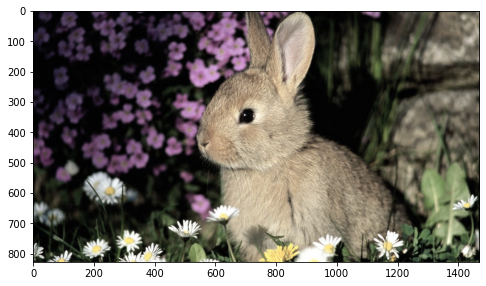

In [39]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

загрузка ЧБ изображения

In [87]:
img = imageio.imread('img.jpeg')

In [88]:
img.shape

(827, 1470, 3)

In [89]:
img = img[:,:,0].astype(np.float32) / 255
print(img.shape)

(827, 1470)


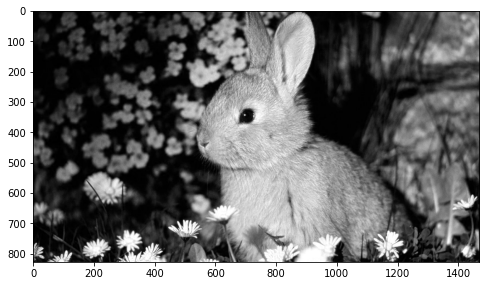

In [90]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

In [91]:
# Box blur
if 0:
    win_size = (15, 15)
    w = np.ones(win_size, dtype=np.float32)
    w = w / np.sum(w)

# Gaussian blur
if 1:
    win_size = (15, 15)
    sigma = 3
    w = np.zeros(win_size, dtype=np.float32)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
    w = w / np.sum(w)

In [92]:
out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+w.shape[0], j:j+w.shape[1]]

        out_img[i,j] = np.sum(w * x)

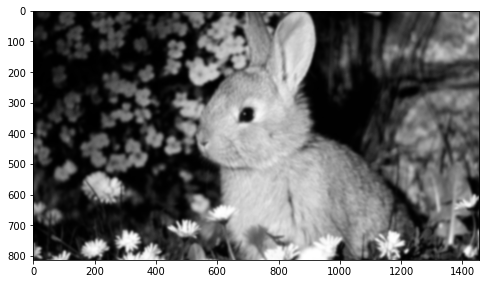

In [93]:
plt.figure(figsize=(8, 8))
plt.imshow(np.abs(out_img), cmap='gray')

In [94]:
import scipy.signal

In [95]:
%%time

out_img = scipy.signal.correlate2d(img, w, mode='valid')

CPU times: user 930 ms, sys: 4.06 ms, total: 934 ms
Wall time: 932 ms


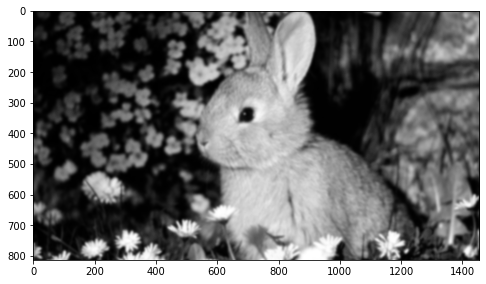

In [96]:
plt.figure(figsize=(8, 8))
plt.imshow(np.abs(out_img), cmap='gray')